In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score


In [2]:
location = "DC_Properties.csv"
df = pd.read_csv(location)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

In [4]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [5]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [6]:
df2=df[['BEDRM','PRICE','WARD']]
df2.head()
#renamed data, and pared it down

,BEDRM,PRICE,WARD
0,4,1095000.0,Ward 2
1,5,NaN,Ward 2
2,5,2100000.0,Ward 2
3,5,1602000.0,Ward 2
4,3,NaN,Ward 2


In [7]:
df2.groupby(df2['WARD']).mean().round(0)
#wanted to see average bedrooms and pricing by ward

,BEDRM,PRICE
WARD,,
Ward 1,3.0,573836.0
Ward 2,2.0,1098570.0
Ward 3,3.0,3077716.0
Ward 4,3.0,489922.0
Ward 5,3.0,395243.0
Ward 6,3.0,526868.0
Ward 7,3.0,233922.0
Ward 8,3.0,271522.0


In [8]:
df2_no_missing = df2.dropna()
df2.isnull().sum()
#Removed blank rows
#_no_missing is the new name and must be referred to as such.

BEDRM        0
PRICE    60741
WARD         1
dtype: int64

In [9]:
df2_no_missing.describe()

,BEDRM,PRICE
count,98216.000000,9.821600e+04
mean,2.606480,9.313516e+05
std,1.393801,7.061325e+06
min,0.000000,1.000000e+00
25%,2.000000,2.400000e+05
50%,3.000000,3.999990e+05
75%,3.000000,6.520000e+05
max,20.000000,1.374275e+08


In [10]:
df2_no_missing.isnull().sum()

BEDRM    0
PRICE    0
WARD     0
dtype: int64

In [11]:
df2_no_missing.count()

BEDRM    98216
PRICE    98216
WARD     98216
dtype: int64

In [12]:
df2_no_missing.describe()

,BEDRM,PRICE
count,98216.000000,9.821600e+04
mean,2.606480,9.313516e+05
std,1.393801,7.061325e+06
min,0.000000,1.000000e+00
25%,2.000000,2.400000e+05
50%,3.000000,3.999990e+05
75%,3.000000,6.520000e+05
max,20.000000,1.374275e+08


In [13]:
df2_no_missing.groupby(['BEDRM','WARD']).mean()

PRICE
BEDRM WARD                
0     Ward 1  4.374085e+05
      Ward 2  1.063929e+06
      Ward 3  8.533485e+06
      Ward 4  2.534351e+05
      Ward 5  2.259893e+05
      Ward 6  2.346078e+05
      Ward 7  3.995500e+05
      Ward 8  2.426689e+06
1     Ward 1  5.299856e+05
      Ward 2  1.012982e+06
      Ward 3  7.120841e+06
      Ward 4  3.366974e+05
      Ward 5  2.355410e+05
      Ward 6  3.477035e+05
      Ward 7  1.865158e+05
      Ward 8  5.731426e+05
2     Ward 1  5.647922e+05
      Ward 2  9.294823e+05
      Ward 3  1.926562e+06
      Ward 4  3.646553e+05
      Ward 5  3.335439e+05
      Ward 6  5.019941e+05
      Ward 7  1.984242e+05
      Ward 8  2.195843e+05
3     Ward 1  5.385860e+05
      Ward 2  1.266270e+06
      Ward 3  7.411769e+05
      Ward 4  4.206029e+05
      Ward 5  3.864872e+05
      Ward 6  5.808165e+05
...                    ...
9     Ward 2  6.007558e+06
      Ward 3  4.422222e+06
      Ward 4  7.910357e+05
      Ward 5  3.350000e+05
      Ward 6  6.532786e+05
      Ward 7  3.400000e+05
      Ward 8  2.537000e+05
10    Ward 1  9.180000e+05
      Ward 2  8.430000e+05
      Ward 3  1.297000e+06
      Ward 5  3.499995e+05
      Ward 6  9.212500e+05
      Ward 7  3.535005e+05
      Ward 8  2.389107e+05
11    Ward 2  2.800000e+05
      Ward 4  7.000000e+05
      Ward 5  2.200000e+06
      Ward 6  1.850000e+06
      Ward 8  3.489200e+05
12    Ward 1  7.480000e+05
      Ward 2  2.396029e+07
      Ward 4  2.915000e+05
      Ward 5  5.608333e+05
      Ward 6  2.000000e+05
      Ward 7  4.150000e+05
      Ward 8  3.064377e+05
13    Ward 8  4.425000e+05
14    Ward 1  9.250000e+05
15    Ward 1  1.105000e+06
20    Ward 1  1.900000e+06

[103 rows x 1 columns]

In [14]:
pd.pivot_table(df2_no_missing,index=["BEDRM"],values=["PRICE"],columns=["WARD"],aggfunc=[np.mean],fill_value=0).round(0)


mean                                                         \
           PRICE                                                          
WARD      Ward 1      Ward 2     Ward 3    Ward 4     Ward 5     Ward 6   
BEDRM                                                                     
0       437409.0   1063929.0  8533485.0  253435.0   225989.0   234608.0   
1       529986.0   1012982.0  7120841.0  336697.0   235541.0   347703.0   
2       564792.0    929482.0  1926562.0  364655.0   333544.0   501994.0   
3       538586.0   1266270.0   741177.0  420603.0   386487.0   580816.0   
4       651662.0   1438164.0   975773.0  582012.0   477404.0   722335.0   
5       784597.0   1767520.0  1421718.0  752056.0   573721.0   872816.0   
6       843308.0   2274467.0  1938651.0  814018.0   542236.0   892812.0   
7       934500.0   2486571.0  2690038.0  887765.0   623350.0  1000159.0   
8       819119.0   3038708.0  2638443.0  528914.0   407348.0   573041.0   
9      1037317.0   6007558.0  4422222.0  791036.0   335000.0   653279.0   
10      918000.0    843000.0  1297000.0       0.0   350000.0   921250.0   
11           0.0    280000.0        0.0  700000.0  2200000.0  1850000.0   
12      748000.0  23960287.0        0.0  291500.0   560833.0   200000.0   
13           0.0         0.0        0.0       0.0        0.0        0.0   
14      925000.0         0.0        0.0       0.0        0.0        0.0   
15     1105000.0         0.0        0.0       0.0        0.0        0.0   
20     1900000.0         0.0        0.0       0.0        0.0        0.0   

                            
                            
WARD     Ward 7     Ward 8  
BEDRM                       
0      399550.0  2426689.0  
1      186516.0   573143.0  
2      198424.0   219584.0  
3      237921.0   224247.0  
4      297808.0   283714.0  
5      323470.0   265254.0  
6      295781.0   263135.0  
7      265101.0   327200.0  
8      280391.0   355596.0  
9      340000.0   253700.0  
10     353500.0   238911.0  
11          0.0   348920.0  
12     415000.0   306438.0  
13          0.0   442500.0  
14          0.0        0.0  
15          0.0        0.0  
20          0.0        0.0

In [15]:
#This graph is intended to show the mean cost of a home by bedrooms by ward. Interesting things to note: 0 bedroom rooms are surprisingly expensive across the wards.
#Prices for 3 and 4 bedroom homes are surprisingly cheap in ward 3, while 2 bedroom homes in Ward 2 are cheaper than expected. 

In [16]:
#PROJECT2

In [17]:

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


In [18]:
df3=df[['BEDRM','PRICE','WARD','BATHRM']]

In [19]:
df3_no_missing = df3.dropna()
df3.isnull().sum()

BEDRM         0
PRICE     60741
WARD          1
BATHRM        0
dtype: int64

In [20]:
df2_no_missing.isnull().sum()

BEDRM    0
PRICE    0
WARD     0
dtype: int64

In [21]:
df3_no_missing.describe().round()

,BEDRM,PRICE,BATHRM
count,98216.0,98216.0,98216.0
mean,3.0,931352.0,2.0
std,1.0,7061325.0,1.0
min,0.0,1.0,0.0
25%,2.0,240000.0,1.0
50%,3.0,399999.0,2.0
75%,3.0,652000.0,2.0
max,20.0,137427545.0,12.0


In [22]:
meanprice = df3_no_missing['PRICE'].mean()
stdprice = df3_no_missing['PRICE'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf3 =df3_no_missing.copy()
copydf3 =copydf3.drop(copydf3[copydf3['PRICE'] > toprange].index)
copydf3 =copydf3.drop(copydf3[copydf3['PRICE'] < botrange].index)

copydf3.head()

,BEDRM,PRICE,WARD,BATHRM
0,4,1095000.0,Ward 2,4
2,5,2100000.0,Ward 2,3
3,5,1602000.0,Ward 2,3
5,5,1950000.0,Ward 2,3
7,4,1050000.0,Ward 2,3


In [23]:
copydf3.count()

BEDRM     97848
PRICE     97848
WARD      97848
BATHRM    97848
dtype: int64

In [24]:
#Checking that Outliers are removed

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


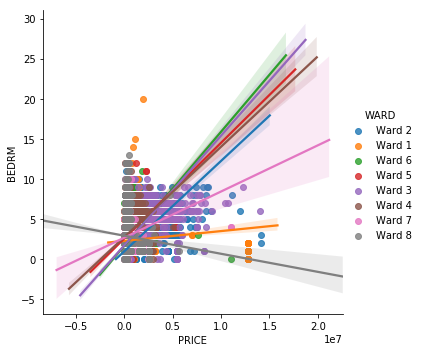

In [25]:
sns.lmplot(x='PRICE', y='BEDRM', data=copydf3, fit_reg=True, hue='WARD')

In [26]:
#Ward 1,7,and 8 do not fit the trend seen in the other wards, where the more bedrooms a house has, the more the cost. 

In [27]:
price_ward_df = copydf3.drop(['BEDRM', 'BATHRM'], axis=1)
price_ward_df.head()

,PRICE,WARD
0,1095000.0,Ward 2
2,2100000.0,Ward 2
3,1602000.0,Ward 2
5,1950000.0,Ward 2
7,1050000.0,Ward 2


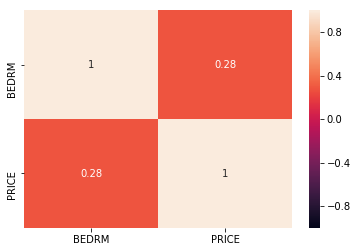

In [28]:
price_bedrm_df = copydf3.drop(['WARD', 'BATHRM'], axis=1)
corr = price_bedrm_df.corr()

sns.heatmap(corr, vmin=-1,annot=True)

In [29]:
#There is a weak correlation between the bedrooms within a house and the price of the home.


In [30]:
copydf3.corr()

,BEDRM,PRICE,BATHRM
BEDRM,1.000000,0.283528,0.708634
PRICE,0.283528,1.000000,0.420305
BATHRM,0.708634,0.420305,1.000000


In [31]:
#There is a stronger correlation between the number of bathrooms a house has and the corresponding number of bedrooms, and the number of bathrooms a house has to the price. It is still not as strong of a correlation that I would like to see to pass judgement to say that there is a direct link. 

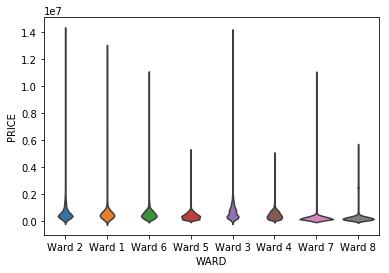

In [32]:
sns.violinplot(x='WARD', y='PRICE',data=price_ward_df, inner=None)

In [33]:
#This graph shows that there are outliers still within the data set, even after cleaning up the data to remove anything outside of the standrad deviation.
#If there weren't outliers, I would expect there to be an even dispertion of the violin. 

In [34]:
import statsmodels.formula.api as smf

In [35]:
result=smf.ols('PRICE ~ BEDRM + BATHRM', data=copydf3).fit()

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                 1.053e+04
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:06:14   Log-Likelihood:            -1.4308e+06
No. Observations:               97848   AIC:                         2.862e+06
Df Residuals:                   97845   BIC:                         2.862e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.857e+04   3947.551     14.838      0.000    5.08e+04    6.63e+04
BEDRM      -1.235e+04   1765.678     -6.996      0.000   -1.58e+04   -8891.154
BATHRM      2.694e+05   2513.000    107.215      0.000    2.65e+05    2.74e+05
==============================================================================
Omnibus:                   160365.487   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        188318145.831
Skew:                          10.813   Prob(JB):                         0.00
Kurtosis:                     216.829   Cond. No.                         8.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result=smf.ols('PRICE ~ BATHRM', data=copydf3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                 2.099e+04
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:06:14   Log-Likelihood:            -1.4308e+06
No. Observations:               97848   AIC:                         2.862e+06
Df Residuals:                   97846   BIC:                         2.862e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.949e+04   3729.111     13.273      0.000    4.22e+04    5.68e+04
BATHRM       2.57e+05   1773.546    144.893      0.000    2.53e+05     2.6e+05
==============================================================================
Omnibus:                   160482.358   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        189076811.321
Skew:                          10.829   Prob(JB):                         0.00
Kurtosis:                     217.260   Cond. No.                         5.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#The standard dev on just these two variables is still way too high to make a correlation. The r-squared remained the same even when I removed bedrooms, I thought it would improve. 

In [39]:
#PROJECT 3

In [40]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
LinearRegression(copy_X=True, fit_intercept=True,n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
copydf3.isnull().sum()

BEDRM     0
PRICE     0
WARD      0
BATHRM    0
dtype: int64

In [42]:
#good, this is what I expected

In [43]:
copydf4=copydf3.drop('WARD',axis=1)

In [44]:
from sklearn.linear_model import LinearRegression
X = copydf4.drop('PRICE',axis=1)
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
lm.fit(X,copydf4.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 58571.91850922414


In [47]:
print('Number of coefficents:', len(lm.coef_))

Number of coefficents: 2


In [48]:
#These should bedrooms and bathrooms

In [49]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features','estimated Coefficients'])

,features,estimated Coefficients
0,BEDRM,-12351.861230
1,BATHRM,269431.335317


In [50]:
#Double checking the number of coefficients here. Looks good. 

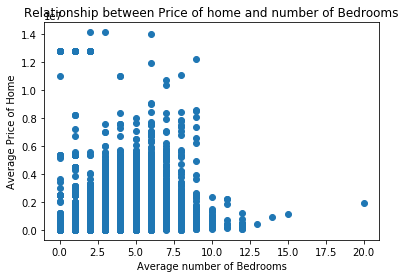

In [51]:
plt.scatter(copydf4.BEDRM, copydf4.PRICE)
plt.xlabel("Average number of Bedrooms")
plt.ylabel("Average Price of Home")
plt.title("Relationship between Price of home and number of Bedrooms")
plt.show()

In [52]:
#Hmm, this isn't what I was expecting to see, and is suprising when I think about how typically the more bedrooms a home has the more expensive the house becomes.
#This graph goes agains my preconcieved notions. I think the reason for this is due to certain wards having a higher starting cost for a home, therefore they could have fewer bedrooms but have a higher cost. 
#There is a trend shown where the more bedrooms the higher the cost, but that begins to tapper around the 7 bedroom mark. 

In [53]:
lm.predict(X)[0:5]

array([1086889.81485806,  805106.6183116 ,  805106.6183116 ,
        805106.6183116 ,  817458.47954122])

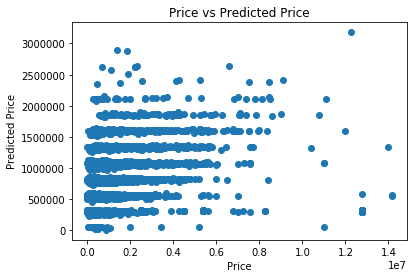

In [54]:
plt.scatter(copydf4.PRICE,lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [55]:
#To me, this indicates that the data set is no lending to a predictable price. The prices are too varied from the predicted to the actual to say with confidence that there is any sort of predicatbility. 


In [56]:
mseFull=np.mean((copydf4.PRICE - lm.predict(X))**2)
print(mseFull)

294054259411.9919


In [57]:
#This is saying that for the price data is $29,405,425,941,199,190 which is clearly inconsistent and unpredictable. The mean squared error here is astronomical, this means to me that the price can not be predicted. 

In [62]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, copydf4.PRICE, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(73386, 2)
(24462, 2)
(73386,)
(24462,)


In [63]:
#good. I want to use the default test size. I am doing this because it will provide more training data. 

In [64]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)

In [65]:
print('Fit a model X_train, and calculate MSE with Y-train:', np.mean((Y_train - lm.predict(X_train))**2))

Fit a model X_train, and calculate MSE with Y-train: 304077522187.13934


In [66]:
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test))**2))

Fit a model X_train, and calculate MSE with X_test, Y_test: 264010203377.93405


In [67]:
## Now I am getting into the Logistical Regression



/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


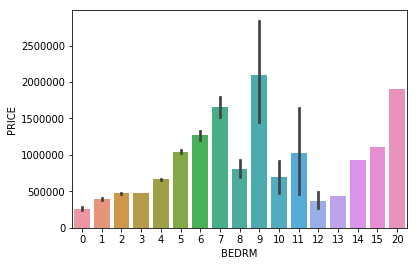

In [68]:
sns.barplot('BEDRM','PRICE', data=copydf4)

In [69]:
#This shows a better correlation between price and bedroom, as compared to the scatterplot, but we are still seeing a drop off in correlation after 7 bedrooms. 


In [71]:
df2.head()

,BEDRM,PRICE,WARD
0,4,1095000.0,Ward 2
1,5,NaN,Ward 2
2,5,2100000.0,Ward 2
3,5,1602000.0,Ward 2
4,3,NaN,Ward 2


In [73]:
dfpriceward = df2.drop('BEDRM',axis=1)

In [74]:
dfpriceward.head()

,PRICE,WARD
0,1095000.0,Ward 2
1,NaN,Ward 2
2,2100000.0,Ward 2
3,1602000.0,Ward 2
4,NaN,Ward 2


In [75]:
#only things I need for Log Regressions


In [82]:
dfpricewardnew = dfpriceward["WARD"].str.split(" ", n = 1, expand = True) 

In [88]:
dfpriceward["NWARD"]= dfpricewardnew[1] 
dfpriceward.drop(columns =["WARD"], inplace = True) 

In [89]:
dfpriceward.head()

,PRICE,NWARD
0,1095000.0,2
1,NaN,2
2,2100000.0,2
3,1602000.0,2
4,NaN,2


In [91]:
#needed to make ward just an integer
dfpriceward.dtypes

PRICE    float64
NWARD     object
dtype: object

In [93]:
dfpriceward.count()

PRICE     98216
NWARD    158956
dtype: int64

In [94]:
dfcleanpw=dfpriceward.dropna()

In [95]:
dfcleanpw.count()

PRICE    98216
NWARD    98216
dtype: int64

In [104]:
dfcleanpw["NWARD"]=dfcleanpw["NWARD"].astype(int)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
dfcleanpw.dtypes

PRICE    float64
NWARD      int64
dtype: object

In [106]:
dfcleanpw.loc[dfcleanpw['NWARD']<=2]

,PRICE,NWARD
0,1095000.0,2
2,2100000.0,2
3,1602000.0,2
5,1950000.0,2
7,1050000.0,2
8,1430000.0,2
14,1325000.0,2
16,1240000.0,2
19,592250.0,2
20,33232.0,2


In [109]:
#Now I am going to make Ward 1 and Ward 2 binaries

In [114]:
def ward_to_numeric(x):
    if x==1:
        return 0
    if x==2:
        return 1

dfcleanpw['BWARD']=dfcleanpw['NWARD'].apply(ward_to_numeric)
dfcleanpw.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,PRICE,NWARD,BWARD
0,1095000.0,2,1.0
2,2100000.0,2,1.0
3,1602000.0,2,1.0
5,1950000.0,2,1.0
7,1050000.0,2,1.0
